# Exploratory Data Analysis for Traffic Collision data 

## Introduction

In this file, we will conduct exploratory data analysis (EDA) for Traffic Collision data collected from the Seattle City GIS database, found here [seattlecitygis](https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions).

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This is to supress the warning messages that might be generated 
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work for you
%matplotlib inline

# Using whitegrid style for our seaborn plots
sns.set_style(style = 'whitegrid')

In [2]:
# This cell is to display all output within each cell in Jupyter Notebook, instead of just the last statement

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading and visualizing our data

In [3]:
#Reading the original table

Collision_data = pd.read_csv('../data_sources/seattle_collisions_merged_from_sdot_wsdot.csv')

In [4]:
#Viewing the data dimension

nrow, ncol = Collision_data.shape
nrow, ncol

(157302, 135)

In [5]:
#Reading the first 10 entries 

Collision_data.head(10)

,longitude,latitude,REPORTNO,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,...,TZ Heavy Vehicle Crash Indicator,TZ Heavy Vehicle Crash Count,TZ Vehicle Train Crash Indicator,TZ Catostrophic Event Indicator,TZ Fatal Crash Indicator,TZ Fatality Count,TZ Suspected Serious Injury Crash Indicator,TZ Suspected Serious Injury Count,TZ Pedestrian Involved Indicator,TZ Pedacyclist Involved Indicator
0,-122.328526,47.703180,EA09347,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,1,Property Damage Only Collision,Angles,4,...,0,0,0,0,0,0,0,0,0,0
1,-122.320383,47.539432,3857045,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,1,Property Damage Only Collision,Sideswipe,2,...,0,0,0,0,0,0,0,0,0,0
2,-122.346793,47.662069,EA05985,Block,NaN,N 46TH ST BETWEEN PHINNEY TURN RD AND GREEN LA...,1,Property Damage Only Collision,Unknown,2,...,0,0,0,0,0,0,0,0,0,0
3,-122.351134,47.570942,3856261,Block,NaN,WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON...,1,Property Damage Only Collision,Rear Ended,2,...,0,0,0,0,0,0,0,0,0,0
4,-122.323135,47.540174,E982090,Block,NaN,EAST MARGINAL WAY S BETWEEN CORSON AVE S AND C...,1,Property Damage Only Collision,Unknown,4,...,0,0,0,0,0,0,0,0,0,0
5,-122.355460,47.705990,E983305,Block,NaN,GREENWOOD AVE N BETWEEN HOLMAN RD N AND N 107T...,1,Property Damage Only Collision,Rear Ended,3,...,0,0,0,0,0,0,0,0,0,0
6,-122.290734,47.709276,3854579,Block,NaN,35TH AVE NE BETWEEN NE 110TH ST AND NE 113TH ST,1,Property Damage Only Collision,Unknown,2,...,0,0,0,0,0,0,0,0,0,0
7,-122.325643,47.661347,EA11707,Block,NaN,NE 45TH ST BETWEEN THACKERAY PL NE AND LATONA ...,2,Injury Collision,Rear Ended,4,...,0,0,0,0,0,0,0,0,0,0
8,-122.336516,47.618525,EA09051,Block,NaN,DENNY WAY BETWEEN TERRY AVE AND BOREN AVE N,1,Property Damage Only Collision,Rear Ended,2,...,0,0,0,0,0,0,0,0,0,0
9,-122.360800,47.665350,3836283,Block,NaN,3RD AVE NW BETWEEN NW 50TH ST AND NW 51ST ST,1,Property Damage Only Collision,Parked Car,2,...,0,0,0,0,0,0,0,0,0,0


### About the original column variables
 
__X__ - longitude, the GPS values moving left to right (East and West) along the X axis  
__Y__ - latitude, represented by horizontal lines, which go up and down (North and South)  
__OBJECTID__ - ESRI unique identifier  
__INCKEY__ - a unique key for the incident, variable type: Long  
__COLDETKEY__ - a secondary key for the incident, variable type: Long  
__REPORTNO__ - unknown  
__STATUS__ - unknown  
__ADDRTYPE__ - Collision address location type, variable type: text, 12 VARCHAR, e.g. Alley, Block, Intersection   
__INTKEY__ - a key that corresponds to the intersection associated with a collision, variable type: Double  
__LOCATION__ - a text description of location, e.g. TERRY AVE BETWEEN JAMES ST AND CHERRY ST  
__EXCEPTRSNCODE__ - unknown  
__EXCEPTRSNDESC__ - unknown  
__SEVERITYCODE__ - a code that corresponds to the severity of the collision:  
$\,\,$ 3 — fatality  
$\,\,$ 2b — serious injury  
$\,\,$ 2 — injury  
$\,\,$ 1 — prop damage  
$\,\,$ 0 — unknown  
__SEVERITYDESC__ - a description of the collision, e.g. Property Damage Only Collision, Injury Collision   
__COLLISIONTYPE__ - a description of the collision type, e.g. Parked Car, Rear Ended, Sideswipe  
__PERSONCOUNT__ - the total number of people involved  
__PEDCOUNT__ - the total number of pedestrians involved  
__PEDCYLCOUNT__ - the total number of cyclists involved  
__VEHCOUNT__ - the total number of vehicles involved  
__INJURIES__ - the total number of injuries other than fatal or disabling at the scene, including broken fingers or toes, abrasions, etc.  
__SERIOUSINJURIES__ - total number of injuries that result in at least a temporary impairment, e.g. a broken limb. It does not mean that the collision resulted in a permanent disability  
__FATALITIES__ - includes the total number of persons who died at the scene of the collisions, were dead on arrival at the hospital, or died within 30 days of the collision from collision-related injuries  
__INCDATE__ - incident date   
__INCDTTM__ - date and time of the incident, variable type: text, 30 VARCHAR  
__JUNCTIONTYPE__ - category of the junction where the collision took place  
__SDOT_COLCODE__ - the SDOT collision code    
__SDOT_COLDESC__ - a description of the collision corresponding to the collision code  
__INATTENTIONIND__ - whether or not collision was due to inattention. (Y/N)  
__UNDERINFL__ - whether or not the driver was under the influence of alcohol or drugs  
__WEATHER__ - a description of the weather, e.g. Raining, Clear  
__ROADCOND__ - a description of the road conditions, e.g. Dry, Wet  
__LIGHTCOND__ - a description of the light conditions, e.g. Dark - No Street Lights, Daylight  
__PEDROWNOTGRNT__ - whether or not the pedestrian right of way was not granted. (Y/N)  
__SDOTCOLNUM__ - unknown  
__SPEEDING__ - whether or not the driver was speeding  
__ST_COLCODE__ - code provided by the state that describes the collision, for example: 
$\,\,$ 0 - Vehicle Going Straight Hits Pedestrian  
$\,\,$ 1 - Vehicle Turning Right Hits Pedestrian  
$\,\,$ 2 - Vehicle Turning Left Hits Pedestrian  
$\,\,$ 3 - Vehicle Backing Hits Pedestrian  
$\,\,$ 4 - Vehicle Hits Pedestrian - All Other Actions  
$\,\,$ 5 - Vehicle Hits Pedestrian - Actions Not Stated  
$\,\,$ 10 - Entering At Angle   
$\,\,$ 11 - From Same Direction - Both Going Straight - Both Moving - Sideswipe  
$\,\,$ 12 - From Same Direction - Both Going Straight - One Stopped - Sideswipe  
$\,\,$ 13 - From Same Direction - Both Going Straight - Both Moving - Rear End  
$\,\,$ ...  
__ST_COLDESC__ - a description that corresponds to the state’s coding designation    
__SEGLANEKEY__ - a key for the lane segment in which the collision occurred  
__CROSSWALKKEY__ - a key for the crosswalk at which the collision occurred  

In [6]:
#changing all the column names to lowercase or add underscores between words

Collision_data.columns = map(str.lower, Collision_data.columns)
Collision_data.head(3)

,longitude,latitude,reportno,addrtype,intkey,location,severitycode,severitydesc,collisiontype,personcount,...,tz heavy vehicle crash indicator,tz heavy vehicle crash count,tz vehicle train crash indicator,tz catostrophic event indicator,tz fatal crash indicator,tz fatality count,tz suspected serious injury crash indicator,tz suspected serious injury count,tz pedestrian involved indicator,tz pedacyclist involved indicator
0,-122.328526,47.703180,EA09347,Intersection,37555.0,1ST AVE NE AND NE 103RD ST,1,Property Damage Only Collision,Angles,4,...,0,0,0,0,0,0,0,0,0,0
1,-122.320383,47.539432,3857045,Intersection,34194.0,ELLIS AVE S AND S MYRTLE ST,1,Property Damage Only Collision,Sideswipe,2,...,0,0,0,0,0,0,0,0,0,0
2,-122.346793,47.662069,EA05985,Block,NaN,N 46TH ST BETWEEN PHINNEY TURN RD AND GREEN LA...,1,Property Damage Only Collision,Unknown,2,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Collision_data.dtypes

longitude                                      float64
latitude                                       float64
reportno                                        object
addrtype                                        object
intkey                                         float64
                                                ...   
tz fatality count                                int64
tz suspected serious injury crash indicator      int64
tz suspected serious injury count                int64
tz pedestrian involved indicator                 int64
tz pedacyclist involved indicator                int64
Length: 135, dtype: object

In [8]:
#Basic Statistical evaluation to familiarize with the data and some quick observations
Collision_data_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in Collision_data.columns:
    tmp['column'] = [c]
    tmp['values'] = [Collision_data[c].unique()]
    tmp['values_count_incna'] = len(list(Collision_data[c].unique()))
    tmp['values_count_nona'] = int(Collision_data[c].nunique())
    tmp['num_miss'] = Collision_data[c].isnull().sum()
    tmp['pct_miss'] = (Collision_data[c].isnull().sum()/ len(Collision_data)).round(3)*100
    Collision_data_stats = Collision_data_stats.append(tmp)
    
Collision_data_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,longitude,"[-122.328525684972, -122.320382726858, -122.34...",22580,22580,0,0.0
0,latitude,"[47.703180044191505, 47.5394319336623, 47.6620...",22580,22580,0,0.0
0,reportno,"[EA09347, 3857045, EA05985, 3856261, E982090, ...",157302,157302,0,0.0
0,addrtype,"[Intersection, Block]",2,2,0,0.0
0,intkey,"[37555.0, 34194.0, nan, 36655.0, 36431.0, 3488...",7199,7198,100275,63.7
...,...,...,...,...,...,...
0,tz fatality count,"[0, 2, 1, 4, 3, 5]",6,6,0,0.0
0,tz suspected serious injury crash indicator,"[0, 1]",2,2,0,0.0
0,tz suspected serious injury count,"[0, 1, 3, 2, 6, 5, 4, 41]",8,8,0,0.0
0,tz pedestrian involved indicator,"[0, 1]",2,2,0,0.0


In [9]:
#This step is for cases where there might be missing values
Collision_data_stats.sort_values(by = 'pct_miss', ascending = False).head(5)

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,inattentionind,"[nan, Y]",2,1,131815,83.8
0,intkey,"[37555.0, 34194.0, nan, 36655.0, 36431.0, 3488...",7199,7198,100275,63.7
0,"first impact location (city st, county rd & mi...",[Lane 1 Off Ramp Increasing Milepost Side of M...,90,89,54322,34.5
0,veh 2 mv driver contributing circumstance 1,"[None, nan, Other Contributing Circ Not Listed...",45,44,48989,31.1
0,veh 1 mv driver age,"[49.0, nan, 70.0, 44.0, 23.0, 18.0, 28.0, 30.0...",93,92,48433,30.8


In [11]:
Collision_data_clean = Collision_data.copy()

In [12]:
#Dropping some columns
#   1) Columns that are keys or identifiers: exceptrsncode, exceptrsndesc
#   2) Dropping columns with Dates

Collision_data_clean = Collision_data_clean.drop(columns=["objectid", "inckey", "coldetkey", "reportno", "intkey", "seglanekey", 
                                                          "crosswalkkey"], inplace=False).head(3)

Collision_data_clean = Collision_data_clean.drop(columns=["incdate", "incdttm"], inplace=False).head(3)

In [13]:
#Dropping some more columns
#   1) Columns that are unknown: exceptrsncode, exceptrsndesc

Collision_data_clean = Collision_data_clean.drop(columns=["exceptrsncode", "exceptrsndesc"], 
                                           inplace=False).head(3)

In [14]:
#Dropping some more columns
#   1) Missing valued columns: speeding, inattentionind and pedrownotgrnt

Collision_data_clean = Collision_data_clean.drop(columns=["speeding", "inattentionind", 
                                                          "pedrownotgrnt"], 
                                           inplace=False).head(3)

In [15]:
#Basic Statistical evaluation to familiarize with the data and some quick observations
Collision_data_clean_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in Collision_data_clean.columns:
    tmp['column'] = [c]
    tmp['values'] = [Collision_data_clean[c].unique()]
    tmp['values_count_incna'] = len(list(Collision_data_clean[c].unique()))
    tmp['values_count_nona'] = int(Collision_data_clean[c].nunique())
    tmp['num_miss'] = Collision_data_clean[c].isnull().sum()
    tmp['pct_miss'] = (Collision_data_clean[c].isnull().sum()/ len(Collision_data_clean)).round(3)*100
    Collision_data_clean_stats = Collision_data_clean_stats.append(tmp)

In [16]:
Collision_data_clean_stats.sort_values(by = 'pct_miss', ascending = False).head(5)

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,st_coldesc,"[nan, One parked--one moving]",2,1,1,33.3
0,sdotcolnum,"[nan, 7015014.0, 4080013.0]",3,2,1,33.3
0,lightcond,"[nan, Dusk, Dark - Street Lights On]",3,2,1,33.3
0,roadcond,"[nan, Ice, Dry]",3,2,1,33.3
0,collisiontype,"[nan, Parked Car]",2,1,1,33.3


The original tablle have some (very few) rows as Y (yes) for "speeding", "inattentionind" and "pedrownotgrnt". 
Can the blanks be considered as "N"? Probably not.

In [17]:
Collision_data_clean.head(10)

,x,y,status,addrtype,location,severitycode,severitydesc,collisiontype,personcount,pedcount,...,sdot_colcode,sdot_coldesc,underinfl,weather,roadcond,lightcond,sdotcolnum,st_colcode,st_coldesc,hitparkedcar
0,-122.362907,47.558372,Unmatched,Block,DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW H...,1,Property Damage Only Collision,NaN,1,0,...,16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,NaN,NaN,NaN,NaN,,NaN,N
1,-122.301868,47.618931,Matched,Block,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE,1,Property Damage Only Collision,Parked Car,2,0,...,12.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",0,Clear,Ice,Dusk,7015014.0,32,One parked--one moving,N
2,-122.391508,47.669461,Matched,Block,NW 56TH ST BETWEEN 26TH AVE NW AND 28TH AVE NW,1,Property Damage Only Collision,Parked Car,2,0,...,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Dark - Street Lights On,4080013.0,32,One parked--one moving,N


In [20]:
column_list_df = []
for col_name in Collision_data.columns:
    y = col_name, Collision_data[col_name].value_counts()
    column_list_df.append(y)
    


In [21]:
column_list_df

[('x',
  -122.332653    295
  -122.344896    280
  -122.328079    272
  -122.344997    269
  -122.299160    255
                ... 
  -122.372196      1
  -122.319134      1
  -122.371962      1
  -122.326167      1
  -122.277588      1
  Name: x, Length: 24928, dtype: int64),
 ('y',
  47.708655    295
  47.717173    280
  47.604161    272
  47.725036    269
  47.579673    255
              ... 
  47.669144      1
  47.674172      1
  47.566637      1
  47.576707      1
  47.690589      1
  Name: y, Length: 24928, dtype: int64),
 ('objectid',
  2047      1
  64074     1
  59976     1
  37447     1
  39494     1
           ..
  124310    1
  130453    1
  128404    1
  118163    1
  2049      1
  Name: objectid, Length: 220338, dtype: int64),
 ('inckey',
  18423     1
  103271    1
  99173     1
  101220    1
  111459    1
           ..
  228036    1
  213699    1
  215746    1
  219840    1
  18441     1
  Name: inckey, Length: 220338, dtype: int64),
 ('coldetkey',
  18423     1
  233

Now we visualize the Frequency distribution of all the features with respect to our target feature and 
look at some plots

In [31]:
#Creating a separate dataframe which has only Categorical Variables
Collision_data_cat = Collision_data_clean.select_dtypes(include = 'object').copy()
Collision_data_cat.head(10)

,status,addrtype,location,severitycode,severitydesc,collisiontype,junctiontype,sdot_coldesc,underinfl,weather,roadcond,lightcond,st_colcode,st_coldesc,hitparkedcar
0,Unmatched,Block,DELRIDGE WAY SW BETWEEN SW EDMUNDS ST AND SW H...,1,Property Damage Only Collision,NaN,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,NaN,NaN,NaN,,NaN,N
1,Matched,Block,E DENNY WAY BETWEEN 23RD AVE AND 24TH AVE,1,Property Damage Only Collision,Parked Car,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",0,Clear,Ice,Dusk,32,One parked--one moving,N
2,Matched,Block,NW 56TH ST BETWEEN 26TH AVE NW AND 28TH AVE NW,1,Property Damage Only Collision,Parked Car,Driveway Junction,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Dark - Street Lights On,32,One parked--one moving,N


In [38]:
Collision_data_reduced = Collision_data[['addrtype','severitydesc','collisiontype','personcount','pedcount','pedcylcount',
                                         'vehcount','injuries','seriousinjuries','fatalities','junctiontype','sdot_coldesc',
                                         'underinfl','weather','roadcond','lightcond','speeding','st_coldesc','hitparkedcar'
                                        ]]

In [57]:
Collision_data_reduced.to_csv('Collision_data_reduced.csv')

In [52]:
Collision_data_reduced.head(10)

,addrtype,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities,junctiontype,sdot_coldesc,underinfl,weather,roadcond,lightcond,speeding,st_coldesc,hitparkedcar
0,Block,Property Damage Only Collision,NaN,1,0,0,0,0,0,0,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,NaN,NaN,NaN,N,NaN,N
1,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE...",0,Clear,Ice,Dusk,N,One parked--one moving,N
2,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,Driveway Junction,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Dark - Street Lights On,N,One parked--one moving,N
3,Intersection,Injury Collision,Angles,4,0,0,2,3,0,0,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,N,Entering at angle,N
4,Block,Unknown,NaN,0,0,0,0,0,0,0,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,N,NaN,N
5,Block,Property Damage Only Collision,NaN,1,0,0,0,0,0,0,Mid-Block (not related to intersection),NOT ENOUGH INFORMATION / NOT APPLICABLE,NaN,NaN,NaN,NaN,N,NaN,N
6,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Dark - Street Lights On,N,From same direction - both going straight - on...,N
7,Block,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - No Street Lights,N,One parked--one moving,N
8,Block,Unknown,NaN,0,0,0,0,0,0,0,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,N,NaN,N
9,Block,Property Damage Only Collision,Parked Car,3,0,0,2,0,0,0,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,Clear,Dry,Dark - Street Lights On,N,One parked--one moving,N


In [51]:
Collision_data_reduced["speeding"]= Collision_data_reduced["speeding"].fillna("N")

In [53]:
Collision_data_reduced.corr(method="pearson").style.format("{:.2}").background_gradient(cmap=plt.get_cmap("coolwarm"),
                                                                         axis=1)

,personcount,pedcount,pedcylcount,vehcount,injuries,seriousinjuries,fatalities
personcount,1.0,0.011,-0.0094,0.56,0.32,0.11,0.046
pedcount,0.011,1.0,-0.016,-0.16,0.17,0.13,0.073
pedcylcount,-0.0094,-0.016,1.0,-0.15,0.12,0.062,0.011
vehcount,0.56,-0.16,-0.15,1.0,0.14,-0.0033,-0.01
injuries,0.32,0.17,0.12,0.14,1.0,0.28,0.067
seriousinjuries,0.11,0.13,0.062,-0.0033,0.28,1.0,0.17
fatalities,0.046,0.073,0.011,-0.01,0.067,0.17,1.0


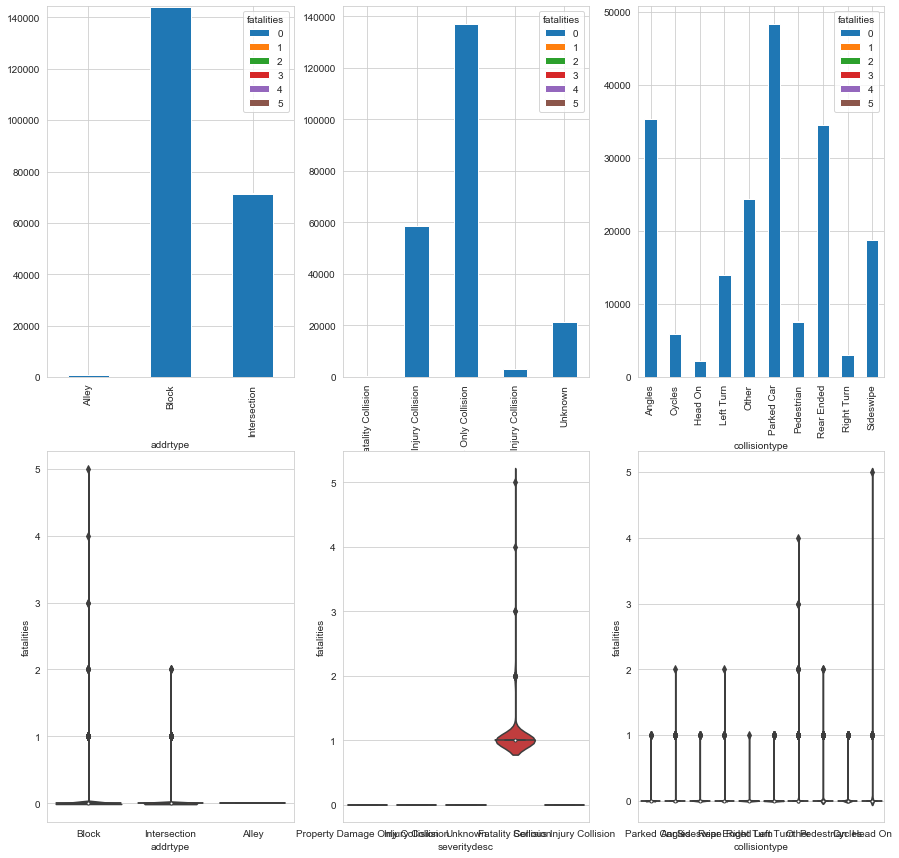

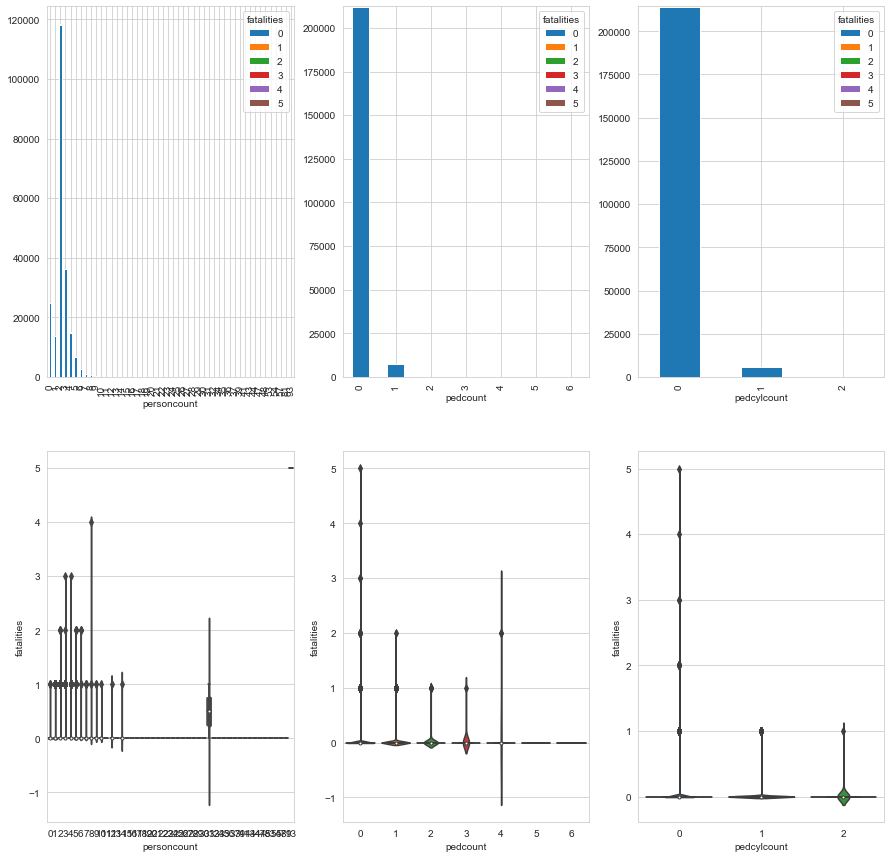

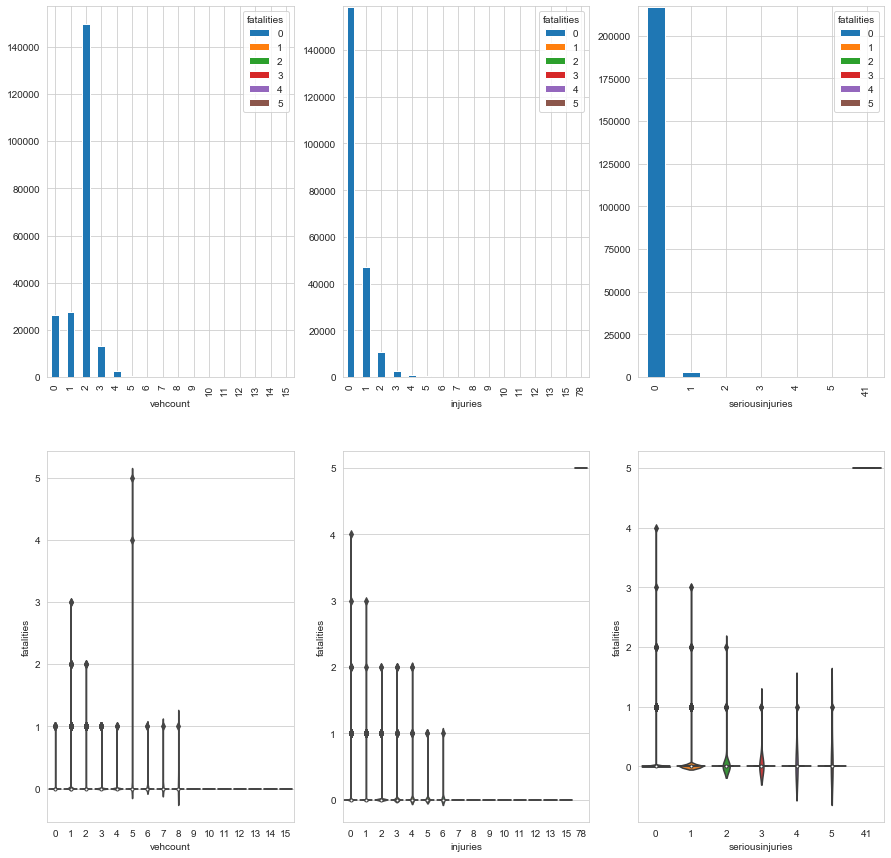

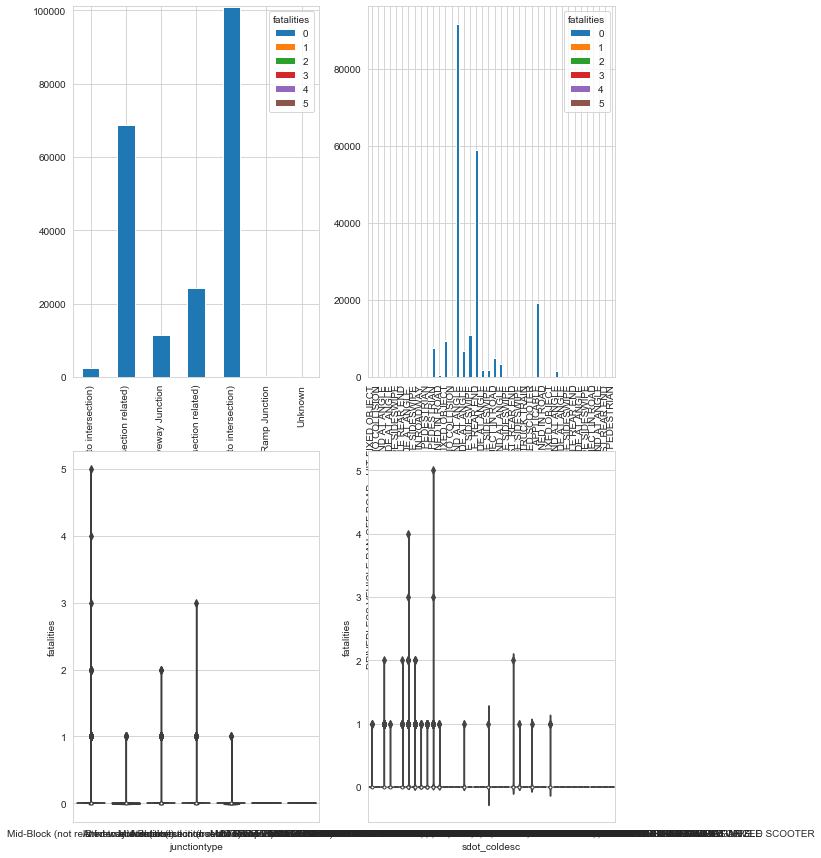

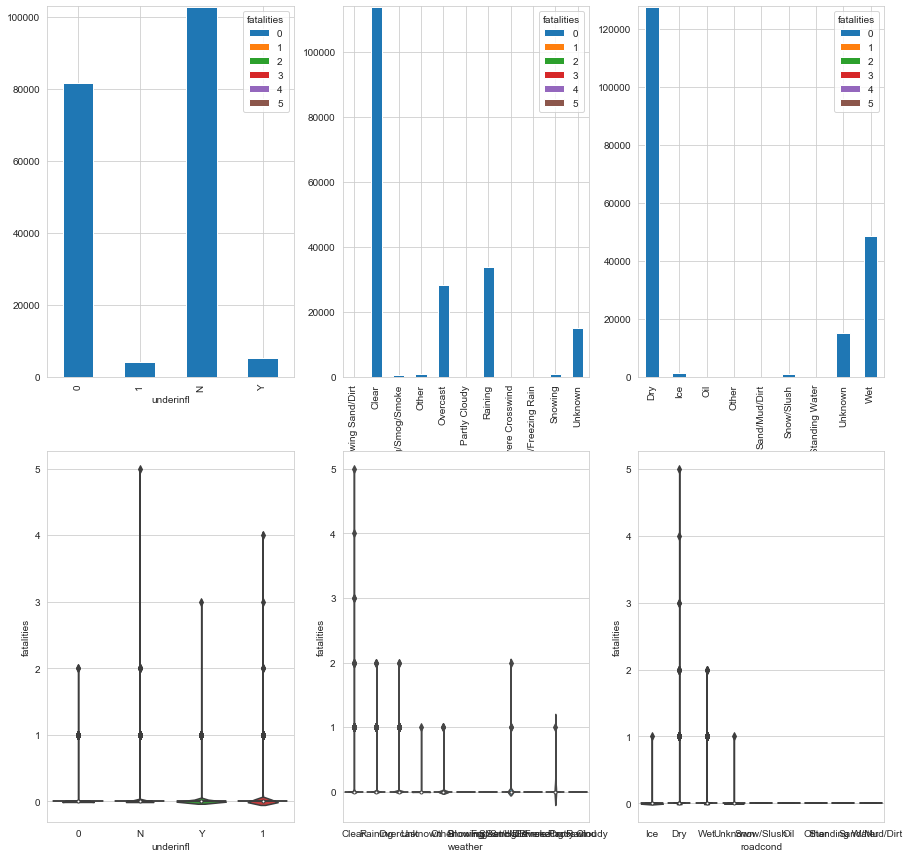

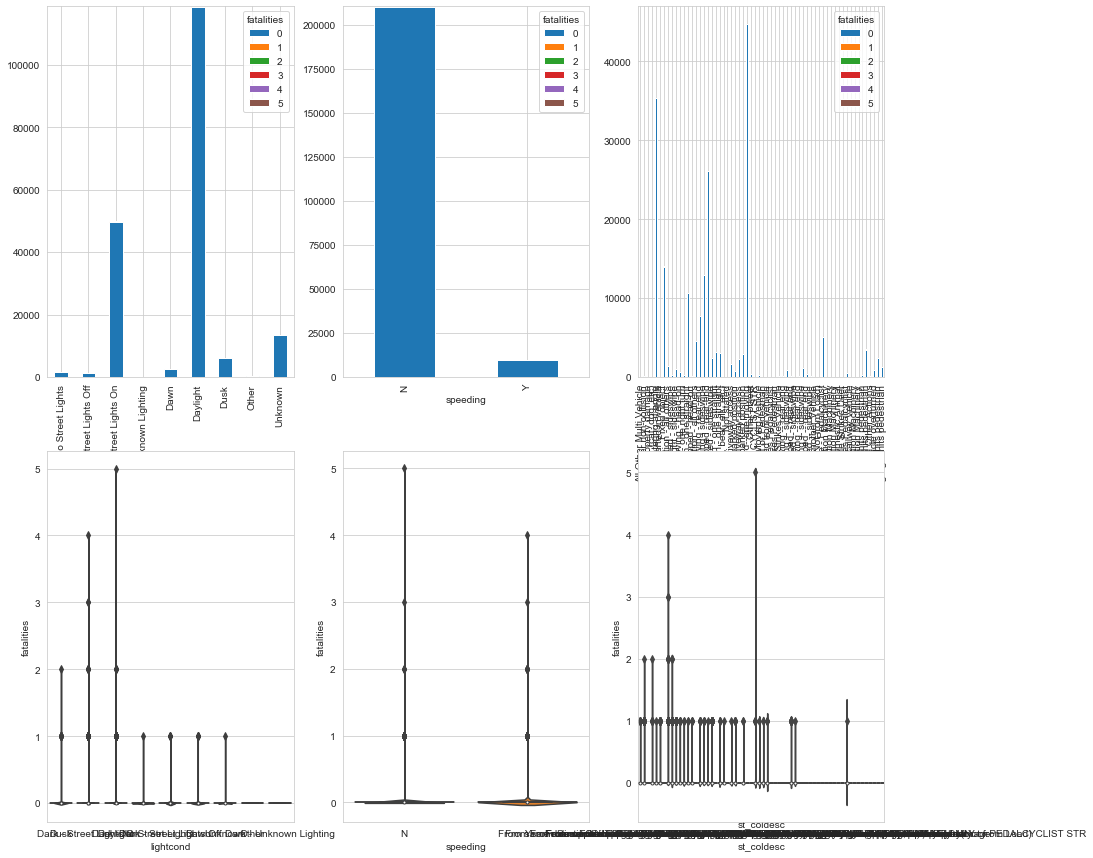

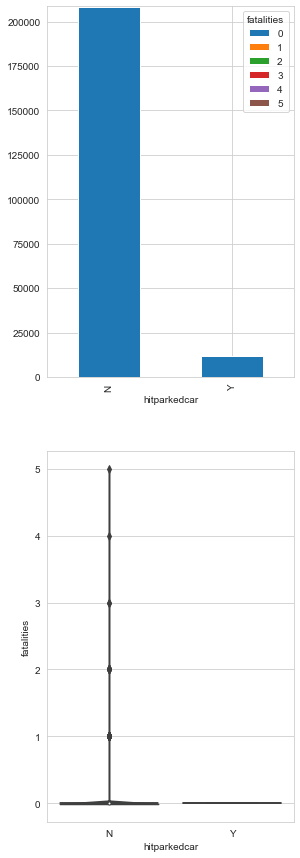

In [58]:
ix = 1
fig = plt.figure(figsize = (15,15))
for c in list(Collision_data_reduced.columns):
    if ix <= 3:
        if c != 'fatalities':
            ax1 = fig.add_subplot(2,3,ix)
            Collision_data_reduced.pivot_table(index=c,columns='fatalities', aggfunc='size').plot.bar(stacked=True,ax=ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=Collision_data_reduced, x=c, y='fatalities', ax=ax2)
            sns.violinplot(data=Collision_data_reduced, x=c, y='fatalities', ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,15))
        ix =1